DIP ASSIGNMENT 1 </BR>
Q1.1 </BR>
(ZIYAAD BALLIM - 1828251)

1.1 - Histogram matching

1. Implementation

Importing libraries

In [19]:
import numpy as np
np.set_printoptions(suppress=True)
from scipy import misc
from scipy.ndimage import convolve
import cv2
from collections import Counter
from skimage.exposure import match_histograms
import matplotlib.pyplot as plt
from skimage import io
import warnings
warnings.filterwarnings("ignore")

In [20]:
def CreateHistogram(im):
    M,N=np.shape(im)
    values,counts=np.unique(im,return_counts=True)
    max=np.max(im)
    L=np.power(2,np.ceil(np.log2(max)))
    Hist=[0]*int(L)
    n=len(values)
    for i in range(n):
        Hist[values[i]]=counts[i]
    try:
        if(np.sum(Hist)==M*N):
            return Hist
    except:
        raise Exception


    

In [21]:
def Group(sorted, Hist):
    map={}
    length=len(Hist)
    sorted=list(sorted)
    for k in range(length):
        count=Hist[k]
        for i in range(count):
            if not sorted:
                break
            map[sorted[0]]=k
            sorted.pop(0)
    return map

In [22]:
def LexSort(matrix):
    newMatrix=np.rot90(matrix)
    lexSortMatrix=np.lexsort(newMatrix)
    return lexSortMatrix

In [23]:
W1 = np.array([[1]])
W2 = np.array([ [0,1,0],[1,1,1], [0,1,0] ])/5
W3 = np.array([ [1,1,1],[1,1,1], [1,1,1] ])/9
W4 = np.array([ [0,0,1,0,0],[0,1,1,1,0], [1,1,1,1,1], [0,1,1,1,0],[0,0,1,0,0]])/13
W5 = np.array([ [0,1,1,1,0], [1,1,1,1,1], [1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]])/21
W6 = np.array([ [1,1,1,1,1], [1,1,1,1,1], [1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])/25
Filters=[W1,W2,W3,W4,W5,W6]

In [24]:
def exact_histogram_matching(im,im_target,K):
    M,N=np.shape(im)
    q=np.zeros((M*N,K))
    im_target=np.resize(im_target,(M,N))
    in_hist=CreateHistogram(im)
    spec_hist=CreateHistogram(im_target)

    for i in range(K):
        output=convolve(im,Filters[i],mode='constant',cval=0)
        q[:,i]=output.flatten()

    O=LexSort(q)
    group=Group(O,spec_hist)     
    out=np.copy(im)
    out=out.flatten()
    LinIndex=list(group.keys())
    IntensList=list(group.values())
    out[LinIndex]=IntensList
    out=np.reshape(out,(M,N))
    return out


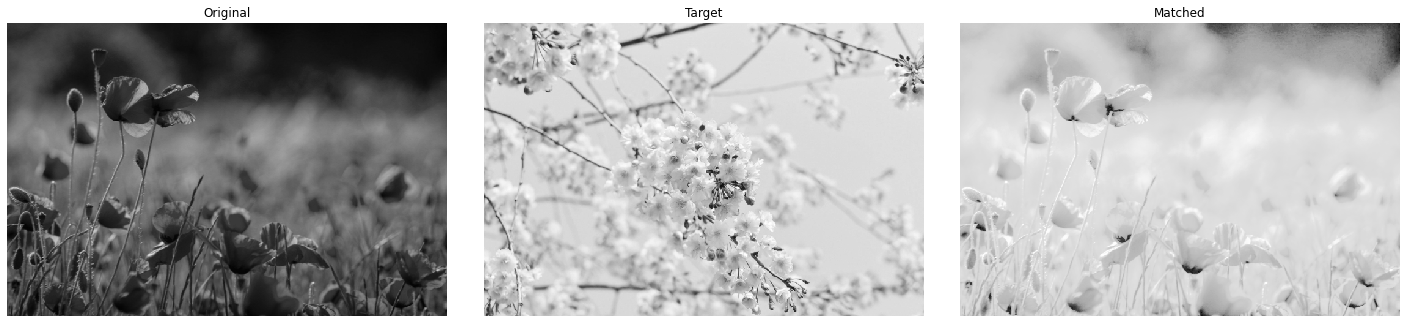

In [25]:
poppies=io.imread("images/poppies.png")
cherry_tree=io.imread("images/cherry_tree.png")
poppie_cherry_output=exact_histogram_matching(poppies,cherry_tree,2)

fig,ax = plt.subplots(nrows = 1,ncols=3,figsize = (20,20))
plt.subplot(1,3,1),io.imshow(poppies),ax[0].set_title("Original")
plt.subplot(1,3,2),io.imshow(cherry_tree),ax[1].set_title("Target")
plt.subplot(1,3,3),io.imshow(poppie_cherry_output,cmap='gray'),ax[2].set_title("Matched")
for a in ax:
    a.axis('off')



(<AxesSubplot:title={'center':'Skimage Built-In Matching Algorithm'}>,
 Text(0.5, 1.0, 'Skimage Built-In Matching Algorithm'))

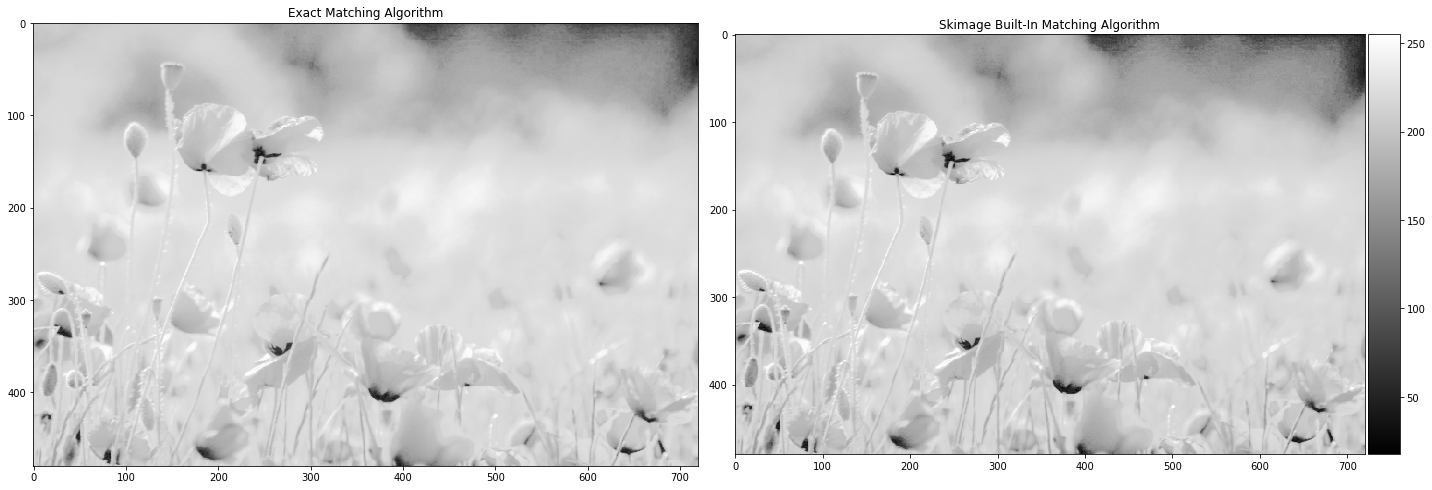

In [26]:
skimage_ouput = match_histograms(poppies,cherry_tree)

fig,ax = plt.subplots(nrows = 1,ncols=2,figsize = (20,20))
plt.subplot(1,2,1),io.imshow(poppie_cherry_output),ax[0].set_title("Exact Matching Algorithm")
plt.subplot(1,2,2),io.imshow(skimage_ouput,cmap='gray'),ax[1].set_title("Skimage Built-In Matching Algorithm")

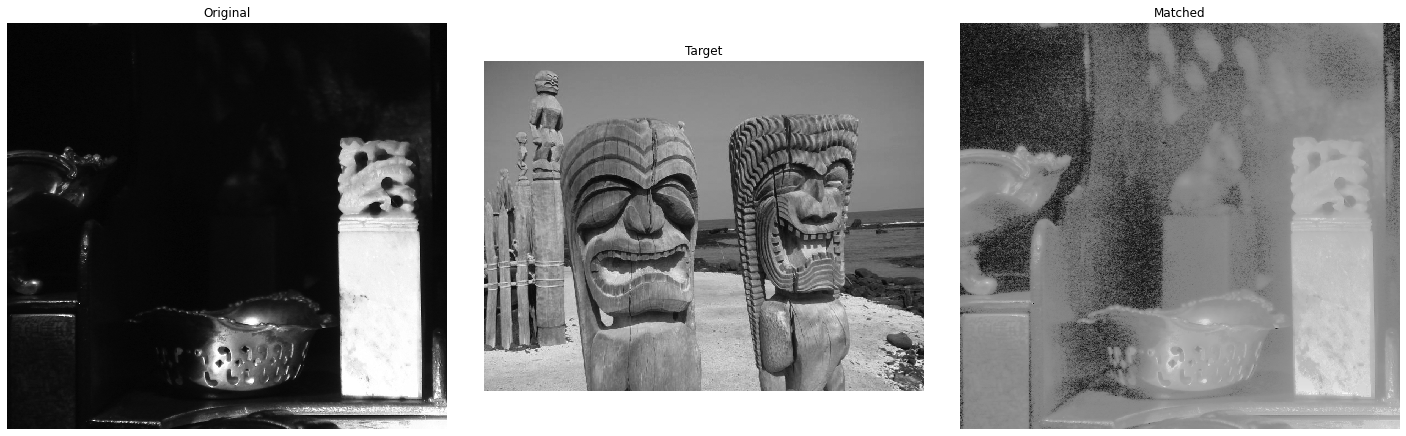

In [27]:
hidden_horse = io.imread("images/hidden-horse.tif")
totem_poles = io.imread("images/totem-poles.tif")
output = exact_histogram_matching(hidden_horse,totem_poles,2)
fig,ax = plt.subplots(nrows = 1,ncols=3,figsize = (20,20))
plt.subplot(1,3,1),io.imshow(hidden_horse),ax[0].set_title("Original")
plt.subplot(1,3,2),io.imshow(totem_poles),ax[1].set_title("Target")
plt.subplot(1,3,3),io.imshow(output,cmap='gray'),ax[2].set_title("Matched")

for a in ax:
    a.axis('off')

(<AxesSubplot:title={'center':'Skimage Built-In Matching Algorithm'}>,
 Text(0.5, 1.0, 'Skimage Built-In Matching Algorithm'))

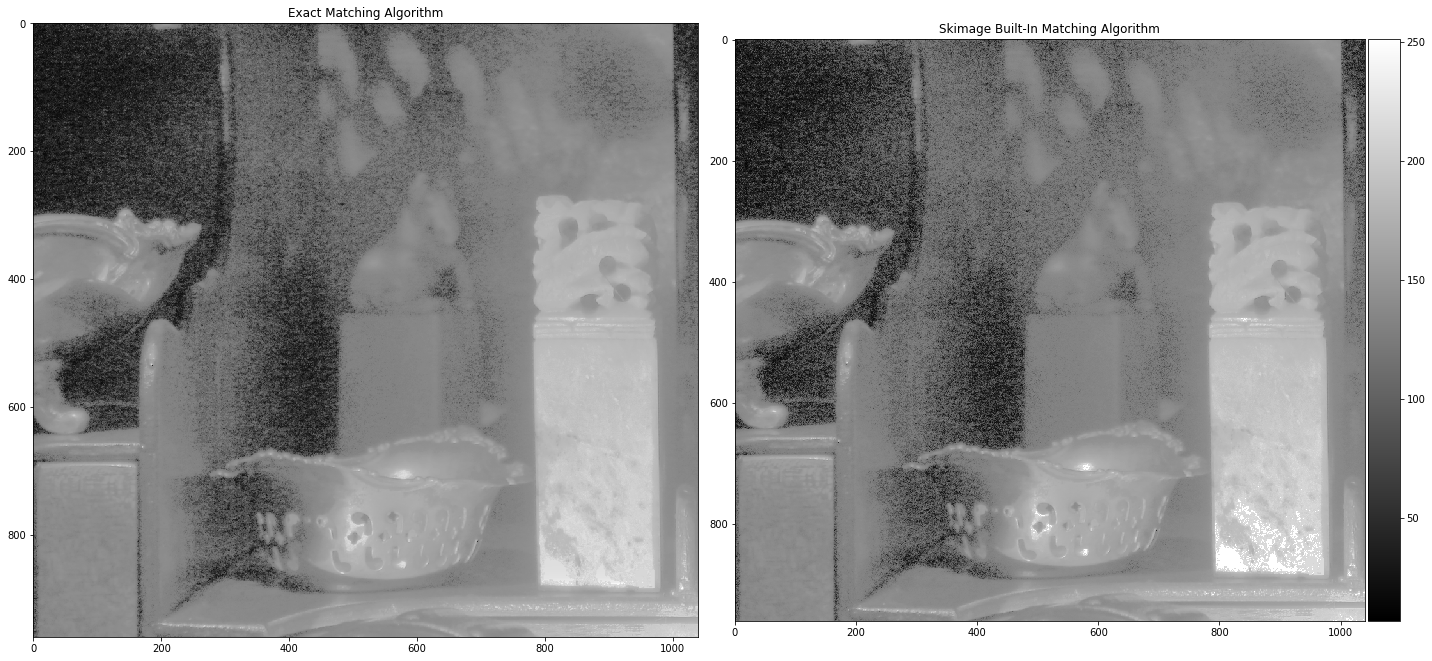

In [28]:
skimage_ouput = match_histograms(hidden_horse,totem_poles)

fig,ax = plt.subplots(nrows = 1,ncols=2,figsize = (20,20))
plt.subplot(1,2,1),io.imshow(output),ax[0].set_title("Exact Matching Algorithm")
plt.subplot(1,2,2),io.imshow(skimage_ouput,cmap='gray'),ax[1].set_title("Skimage Built-In Matching Algorithm")

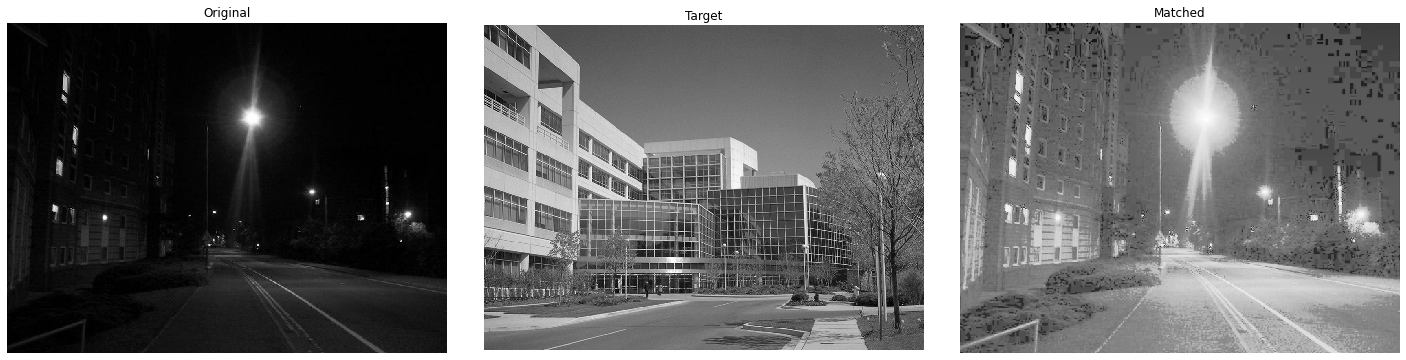

In [29]:
road_low_2 = io.imread("images/road_low_2.jpg")
national_archives_bld = io.imread("images/national-archives-bld.tif")
output = exact_histogram_matching(road_low_2,national_archives_bld,2)
fig,ax = plt.subplots(nrows = 1,ncols=3,figsize = (20,20))
plt.subplot(1,3,1),io.imshow(road_low_2),ax[0].set_title("Original")
plt.subplot(1,3,2),io.imshow(national_archives_bld),ax[1].set_title("Target")
plt.subplot(1,3,3),io.imshow(output,cmap='gray'),ax[2].set_title("Matched")
for a in ax:
    a.axis('off')

(<AxesSubplot:title={'center':'Skimage Built-In Matching Algorithm'}>,
 Text(0.5, 1.0, 'Skimage Built-In Matching Algorithm'))

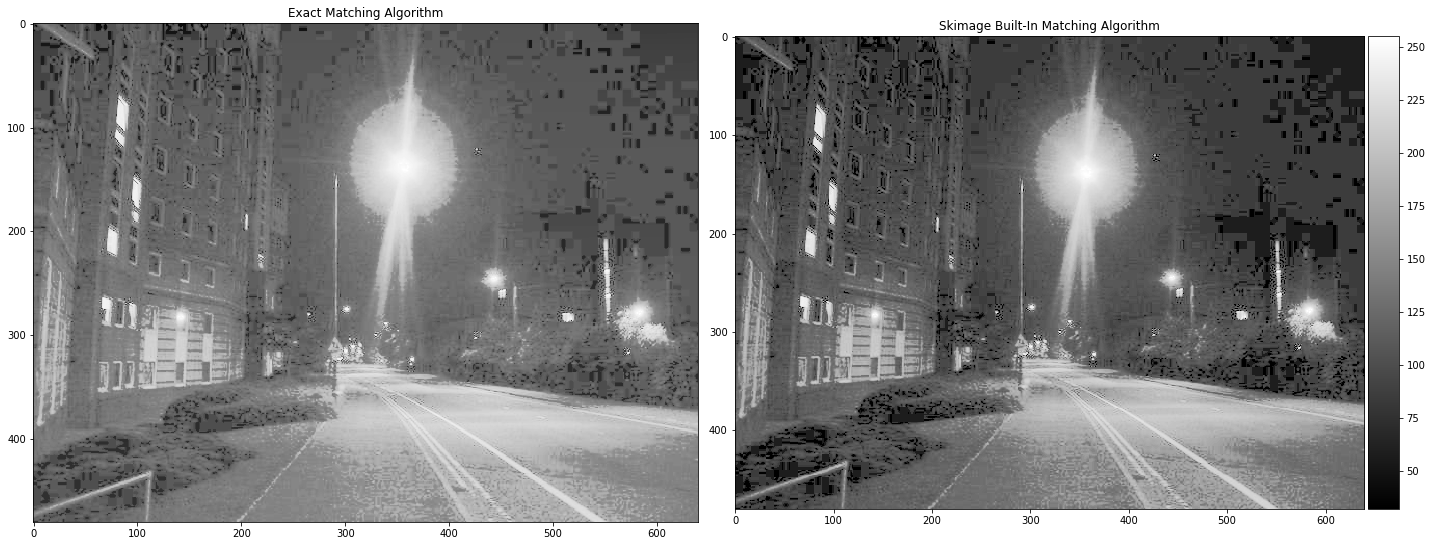

In [30]:
skimage_ouput = match_histograms(road_low_2,national_archives_bld)

fig,ax = plt.subplots(nrows = 1,ncols=2,figsize = (20,20))
plt.subplot(1,2,1),io.imshow(output),ax[0].set_title("Exact Matching Algorithm")
plt.subplot(1,2,2),io.imshow(skimage_ouput,cmap='gray'),ax[1].set_title("Skimage Built-In Matching Algorithm")

2. Analysis

In [31]:
def GetMapDict(im):
    pixels=Counter(im.flatten())
    map_list=np.zeros(256)
    if 0 in pixels:
        map_list[0]=pixels[0]
    
    for i in range(1,256):
        if i in pixels:
            map_list[i]=map_list[i-1]+pixels[i]
        else:
            map_list[i]=map_list[i-1]
    MN=np.shape(im)[0]*np.shape(im)[1]
    map_list=(map_list/MN)*255
    keys=np.linspace(0,255,num=256,dtype=np.int32)
    MapDict=dict(zip(keys,map_list.astype(np.int32)))

    return MapDict

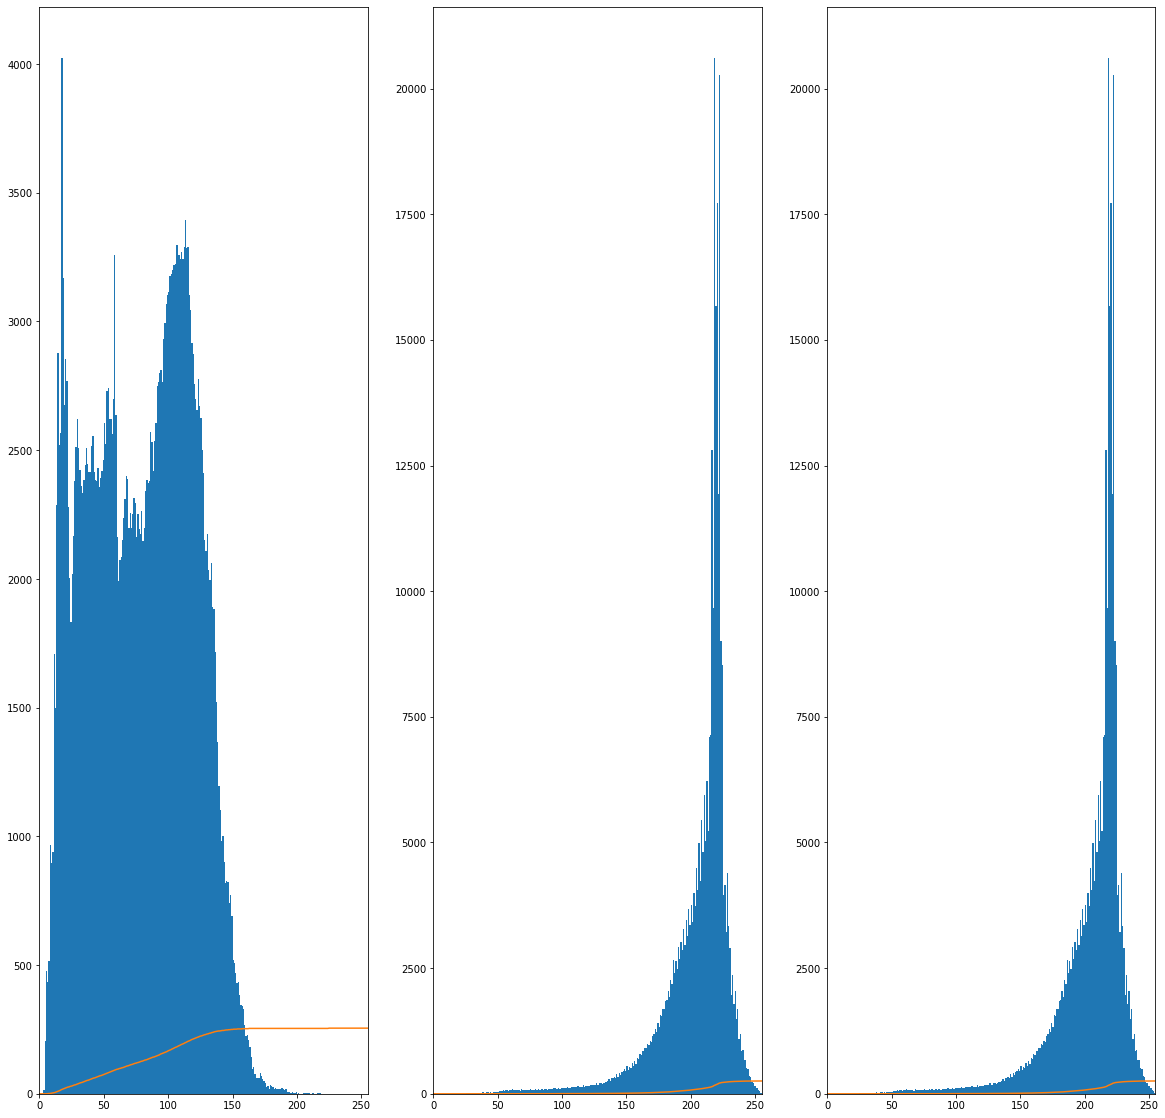

In [32]:
poppies_hist=CreateHistogram(poppies)
cherry_tree_hist=CreateHistogram(cherry_tree)
poppie_cherry_hist=CreateHistogram(poppie_cherry_output)

indensity=np.linspace(0,255,num=256,dtype=np.int32)
PoppieMapDict=GetMapDict(poppies)
CherryMapDict=GetMapDict(cherry_tree)
PoppieCherryMapDict=GetMapDict(poppie_cherry_output)

fig,ax = plt.subplots(nrows = 1,ncols=3,figsize = (20,20))
# plt.figure()
plt.subplot(1,3,1)
plt.xlim([0,255])
plt.hist(poppies.ravel(),256,[0,256])
plt.plot(indensity,list(PoppieMapDict.values()))
plt.subplot(1,3,2)
plt.xlim([0,255])
plt.hist(cherry_tree.ravel(),256,[0,256])
plt.plot(indensity,list(CherryMapDict.values()))
plt.subplot(1,3,3)
plt.xlim([0,255])
plt.hist(poppie_cherry_output.ravel(),256,[0,256])
plt.plot(indensity,list(PoppieCherryMapDict.values()))